In [196]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

In [197]:
data = pd.read_csv('C:\\Users\\Deepak\\Downloads\\wine.csv')

In [198]:
data.shape

(178, 15)

In [199]:
data.dtypes

class_label               int64
class_name               object
alcohol                 float64
malic_acid              float64
ash                     float64
alcalinity_of_ash       float64
magnesium                 int64
total_phenols           float64
flavanoids              float64
nonflavanoid_phenols    float64
proanthocyanins         float64
color_intensity         float64
hue                     float64
od280                   float64
proline                   int64
dtype: object

In [200]:
data.head(5)

,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1,Barolo,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,Barolo,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,Barolo,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,Barolo,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,Barolo,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [201]:
data.class_label.value_counts()

2    71
1    59
3    48
Name: class_label, dtype: int64

In [202]:
data.class_name.value_counts()

Grignolino    71
Barolo        59
Barbera       48
Name: class_name, dtype: int64

In [203]:
X = data.drop(['class_label', 'class_name'], axis = 1)
y = data['class_name']

In [204]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
labels = kmeans.predict(X)
df_old = pd.DataFrame({'labels': labels, 'class_names': y})
df_old.head()

,labels,class_names
0,0,Barolo
1,0,Barolo
2,0,Barolo
3,0,Barolo
4,2,Barolo


In [205]:
pd.crosstab(df_old['labels'], df_old['class_names'])

class_names,Barbera,Barolo,Grignolino
labels,,,
0,0,46,1
1,19,0,50
2,29,13,20


In [206]:
X.var()

alcohol                     0.659062
malic_acid                  1.248015
ash                         0.075265
alcalinity_of_ash          11.152686
magnesium                 203.989335
total_phenols               0.391690
flavanoids                  0.997719
nonflavanoid_phenols        0.015489
proanthocyanins             0.327595
color_intensity             5.374449
hue                         0.052245
od280                       0.504086
proline                 99166.717355
dtype: float64

In [207]:
ss = StandardScaler()
kmeans = KMeans(n_clusters = 3)
pipeline = make_pipeline(ss, kmeans)
pipeline.fit(X)
labels = pipeline.predict(X)
df_new = pd.DataFrame({'labels': labels, 'class_names': y})
df_new.head()

,labels,class_names
0,2,Barolo
1,2,Barolo
2,2,Barolo
3,2,Barolo
4,2,Barolo


In [208]:
pd.crosstab(df_old['labels'], df_old['class_names'])

class_names,Barbera,Barolo,Grignolino
labels,,,
0,0,46,1
1,19,0,50
2,29,13,20


In [209]:
pd.crosstab(df_new['labels'], df_new['class_names'])

class_names,Barbera,Barolo,Grignolino
labels,,,
0,48,0,3
1,0,0,65
2,0,59,3


In [ ]:
Above two cross tables clearly show that post Standardization, accuracy has been increase multi-folds

### Finding value of n_clusters

In [210]:
inertias = []
Clusters = np.arange(1,10)
for c in Clusters:
    Kmeans = KMeans(n_clusters = c)
    Kmeans.fit(X)
    inertias.append(Kmeans.inertia_)

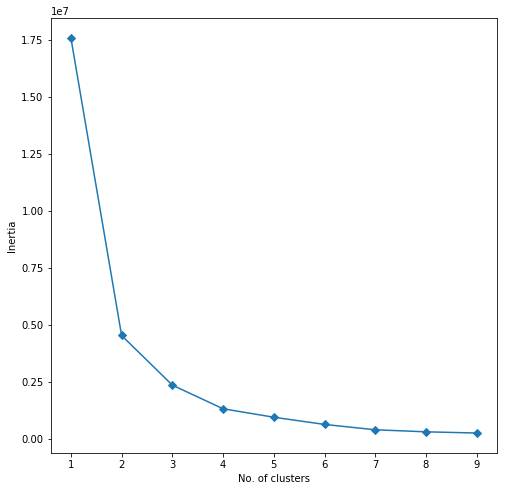

In [212]:
plt.figure(figsize=(8,8))
plt.plot(Clusters, inertias, marker = 'D')
plt.xlabel('No. of clusters')
plt.ylabel('Inertia')
plt.show()